In [2]:
#import external libraries
import numpy as np
from matplotlib import pyplot as plt
import random as rnd

800


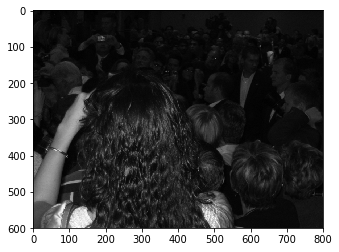

In [71]:
#load and display original low contrast image
#note that the intensity values of the image are converted to a range between 0 and 255
img = plt.imread("C:/Users/jack_/Downloads/crowd.png")
im_uint8 = ((img - np.min(img)) * (1/(np.max(img) - np.min(img)) * 255)).astype('uint8')
plt.imshow(im_uint8)

In [3]:
# Create normalized intensity histogram from an input image
def create_pdf(im_in):
    pdf = []
    flat_im = im_in.flatten()
    for x in np.unique(flat_im):
        cnt = np.count_nonzero(flat_im==x)
        pdf.append(cnt/flat_im.shape[0])
    return pdf

In [4]:
# Create the cumulative distribution function from an input pdf
def create_cdf(pdf):
    cdf = pdf[:]
    for i in range(1, len(pdf)):
        cdf[i] = cdf[i-1] + pdf[i]
    return cdf

In [46]:
# Create a histogram equalized image using the computed cdf
def histogram_equalization(im_in):
    pdf = create_pdf(im_in) # Your previously implemented function
    cdf = create_cdf(pdf) # Your previously implemented function
    equalized_im = im_in.copy()
    terms = []
    cdf_min = min(cdf)
    size = len(im_in.flatten())
    diff = size - cdf_min
    unique = np.unique(im_in)
    unique_len = len(unique) - 1
    for i in range(len(unique)):
        term1 = (cdf[i] - cdf_min)
        term2 = np.round(term1 * unique_len)
        terms.append(term2)
    print(len(terms))
    for i in range(len(im_in)):
        for j in range(len(im_in[i])):
            for k in range(len(im_in[i][j])):
                ind = im_in[i][j][k]
                equalized_im[i][j][k] = terms[ind]
    return equalized_im

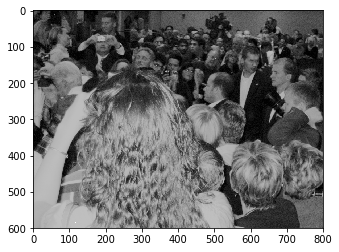

In [43]:
#display the equalized image
hst = histogram_equalization(im_uint8)
plt.imshow(hst)

(array([1.92584559e-02, 5.80747549e-03, 1.95232843e-03, 7.49509804e-04,
        5.62500000e-04, 5.42218137e-04, 2.54963235e-04, 7.06495098e-05,
        1.13664216e-04, 9.90392157e-03]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

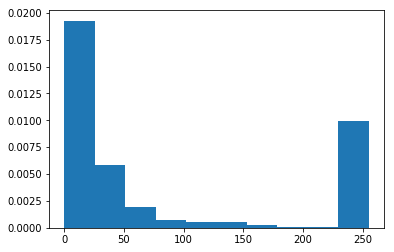

In [113]:
#display the histograms of the original and equalizaed images respectively
plt.hist(im_uint8.flatten(), density=True)

(array([0.00366734, 0.00321287, 0.00485515, 0.00350527, 0.00401783,
        0.00412567, 0.00405263, 0.00197475, 0.        , 0.00980417]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

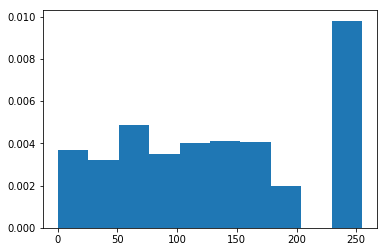

In [114]:
plt.hist(hst.flatten(), density=True)

(array([0.49109063, 0.63918125, 0.68896563, 0.70807813, 0.72242187,
        0.73624844, 0.74275   , 0.74455156, 0.74745   , 1.        ]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

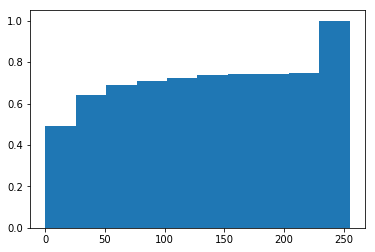

In [115]:
#display the cumulative histogram of the original and equalized images respectively
plt.hist(im_uint8.flatten(), density=True, cumulative=True)

(array([0.09351719, 0.17544531, 0.29925156, 0.38863594, 0.49109063,
        0.59629531, 0.6996375 , 0.74999375, 0.74999375, 1.        ]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

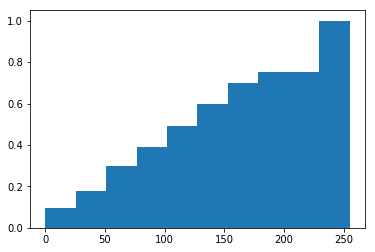

In [116]:
plt.hist(hst.flatten(), density=True, cumulative=True)

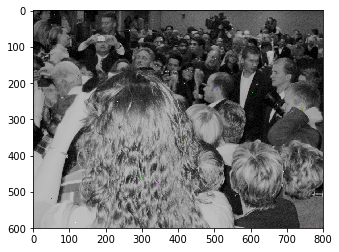

In [69]:
#reapply equalization to previously equalized image
#note that the image is first padded because it is missing certain intensity values
t_hst = transform_image(hst)
hst2 = histogram_equalization2(t_hst)
plt.imshow(hst2)

In [20]:
def histogram_equalization2(im_in):
    pdf = create_pdf(im_in) # Your previously implemented function
    cdf = create_cdf(pdf) # Your previously implemented function
    # Create a histogram equalized image using your computed cdf
    terms = []
    cdf_min = min(cdf)
    size = len(im_in.flatten())
    diff = size - cdf_min
    unique = np.unique(im_in)
    unique_len = len(unique) - 1
    for i in range(len(unique)):
        term1 = (cdf[i] - cdf_min)
        term2 = np.round(term1 * unique_len)
        terms.append(term2)
    new_im_in = ((im_in - np.min(im_in)) * (1/(np.max(im_in) - np.min(im_in)) * (len(terms) - 1))).astype('uint8')
    equalized_im = new_im_in.copy()
    for i in range(len(new_im_in)):
        for j in range(len(new_im_in[i])):
            for k in range(len(new_im_in[i][j])):
                ind = new_im_in[i][j][k]
                equalized_im[i][j][k] = terms[ind]
    return equalized_im

(array([0.00366769, 0.00321303, 0.00485515, 0.00350523, 0.00401793,
        0.00412537, 0.0040519 , 0.0019771 , 0.        , 0.00980229]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

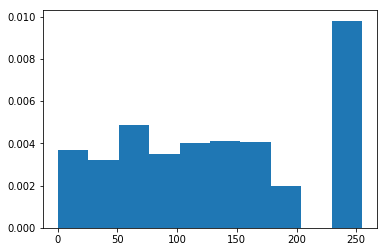

In [70]:
#display the histogram for the double-equalized image
plt.hist(hst2.flatten(), density=True)

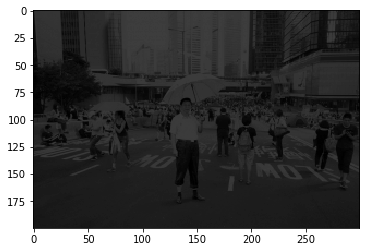

In [94]:
#load and display a second sample image to be equalized
img2 = plt.imread("C:/Users/jack_/Downloads/f21-2-300x200.png")
im2_uint8 = ((img2 - np.min(img2)) * (1/(np.max(img2) - np.min(img2)) * 255)).astype('uint8')
plt.imshow(im2_uint8)

In [95]:
#pad an image by randomly inserting missing certain intensities bewteen 0 and 255
#to be used with certain images before equalization
def transform_image(img):
    new_img = img.copy()
    unique = np.unique(img)
    lngt1 = len(img) - 1
    lngt2 = len(img[0]) - 1
    lngt3 = len(img[0][0]) - 1
    for n in range(256):
        if n not in unique:
            n_times = rnd.randint(1, 3)
            for nt in range(n_times):
                ind1 = rnd.randint(0, lngt1)
                ind2 = rnd.randint(0, lngt2)
                ind3 = rnd.randint(0, lngt3)
                new_img[ind1][ind2][ind3] = n
    return new_img

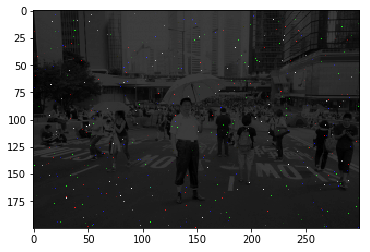

In [96]:
#transform the image for equalization purposes
t_img = transform_image(im2_uint8)
plt.imshow(t_img)

256


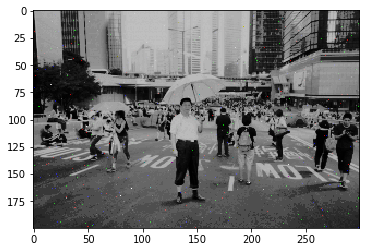

In [97]:
#equalize and display the padded image
hst4 = histogram_equalization(t_img)
plt.imshow(hst4)

(array([0.00669216, 0.0174549 , 0.00526471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00980392]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

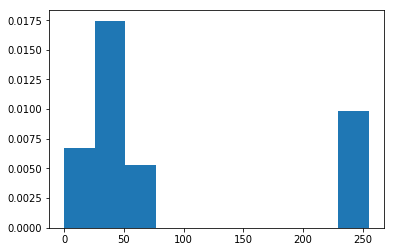

In [98]:
#display the histograms for both the original and equalized image
plt.hist(im2_uint8.flatten(), density=True)

(array([0.00382141, 0.00286291, 0.00199167, 0.00536683, 0.00549412,
        0.00358987, 0.00417941, 0.00212386, 0.        , 0.00978562]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

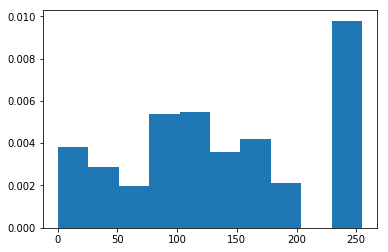

In [101]:
plt.hist(hst4.flatten(), density=True)

In [36]:
intensities = []
cnt = 1
cnt2 = 1
row = []
for i in range(215, 256):
    repeated = rnd.randint(cnt2,cnt)
    for r in range(repeated):
        if len(row) == 30:
            break
        row.append(i)
    if i < 235:
        cnt += 2
        cnt2 += 2
    elif i >= 235:
        if cnt > 2:
            cnt -= 2
        if cnt2 > 2:
            cnt2 -= 2
    if len(row) == 30:
        intensities.append(row)
        row = []
cnt = 1
cnt2 = 1
for i in range(31):
    repeated = rnd.randint(cnt2,cnt)
    for r in range(repeated):
        if len(row) == 30:
            break
        row.append(i)
    if i < 15:
        cnt2 += 2
        cnt += 2
    elif i >= 15:
        if cnt > 2:
            cnt -= 2
        if cnt2 > 2:
            cnt2 -= 2
    if len(row) == 30:
        intensities.append(row)
        row = []

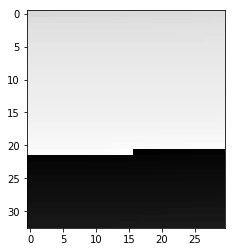

In [37]:
plt.imshow(intensities, cmap="gray")

(array([0.00673401, 0.01386413, 0.01782531, 0.01604278, 0.01247772,
        0.00118835, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00495148, 0.01069519, 0.01406219,
        0.02970885, 0.02970885, 0.01782531, 0.01445831, 0.00653595]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

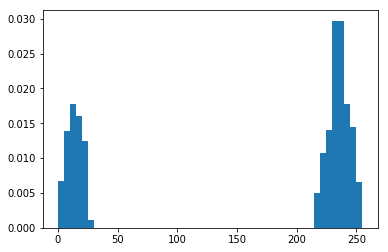

In [38]:
new = np.asarray(intensities)
plt.hist(new.flatten(), bins=50, density=True)